In [ ]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.




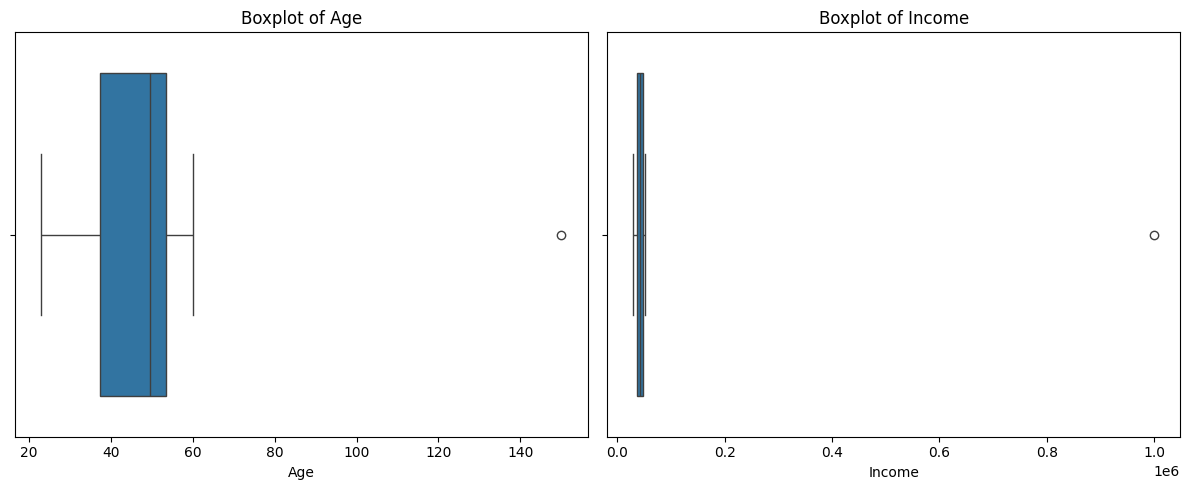

Outliers detected by Z-score method (Age):
    Age     Z_Age
13  150  3.341138

Outliers detected by IQR method (Age):
    Age
13  150

Outliers detected by Z-score method (Income):
     Income  Z_Income
13  1000000  3.604263

Outliers detected by IQR method (Income):
     Income
13  1000000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Sample dataset
data = {
    'Age': [23, 25, 31, 35, 45, 46, 49, 50, 51, 52, 54, 55, 60, 150],  # 150 is an outlier
    'Income': [30000, 32000, 34000, 36000, 38000, 39000, 41000, 43000, 45000, 47000, 49000, 50000, 52000, 1000000]  # 1,000,000 outlier
}

df = pd.DataFrame(data)

# --- Z-score Method ---
df['Z_Age'] = zscore(df['Age'])
df['Z_Income'] = zscore(df['Income'])

# Flag outliers (using typical threshold 3)
df['Outlier_Z_Age'] = df['Z_Age'].abs() > 3
df['Outlier_Z_Income'] = df['Z_Income'].abs() > 3

# --- IQR Method ---
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

df['Outlier_IQR_Age'] = iqr_outliers(df['Age'])
df['Outlier_IQR_Income'] = iqr_outliers(df['Income'])

# --- Boxplot Method (visual) ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')

plt.tight_layout()
plt.show()

# --- Summary of Outliers ---
print("Outliers detected by Z-score method (Age):")
print(df[df['Outlier_Z_Age']][['Age', 'Z_Age']])

print("\nOutliers detected by IQR method (Age):")
print(df[df['Outlier_IQR_Age']][['Age']])

print("\nOutliers detected by Z-score method (Income):")
print(df[df['Outlier_Z_Income']][['Income', 'Z_Income']])

print("\nOutliers detected by IQR method (Income):")
print(df[df['Outlier_IQR_Income']][['Income']])
